In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(418, 11)

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [6]:
train.shape
test.shape

(418, 11)

In [7]:
td = pd.concat([train,test],ignore_index=True,sort=False)
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
import seaborn as sns


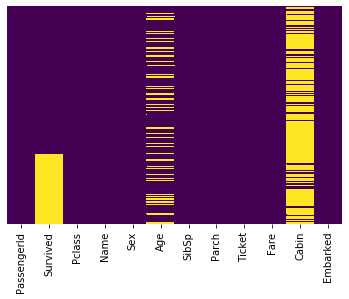

In [9]:
sns.heatmap(td.isnull(),cmap='viridis',cbar=False,yticklabels=False)

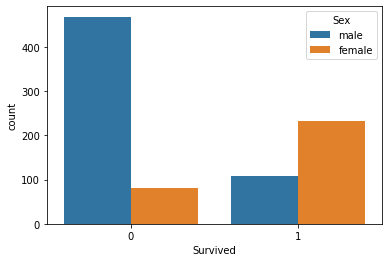

In [10]:
sns.countplot(x='Survived',data=train,hue='Sex')

In [11]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


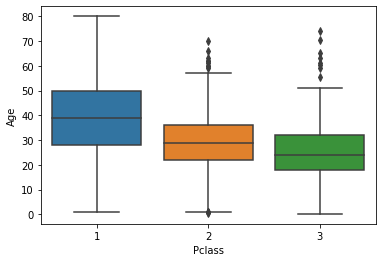

In [14]:
sns.boxplot(x='Pclass',y='Age',data=td)

In [16]:
def insert_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
            

In [17]:
td['Age'] = td[['Age','Pclass']].apply(insert_age,axis=1)

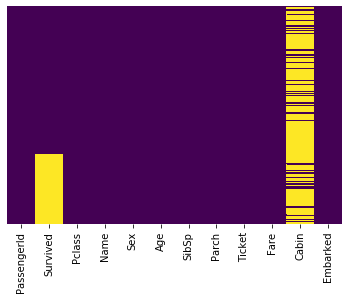

In [18]:
sns.heatmap(td.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [19]:
td.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

In [22]:
sex = pd.get_dummies(td['Sex'],drop_first=True)

In [23]:
embark= pd.get_dummies(td['Embarked'],drop_first=True)

In [24]:
td = pd.concat([td,sex,embark],axis=1)

In [25]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


In [27]:
p_class = pd.get_dummies(td['Pclass'],drop_first=True)

In [28]:
td = pd.concat([td,p_class],axis=1)

In [29]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1


In [30]:
td['Family'] = td['SibSp'] + td['Parch']
td.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,1


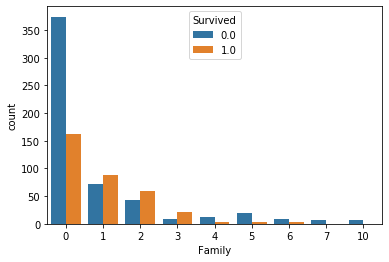

In [31]:
sns.countplot(td['Family'],hue=td['Survived'])

In [33]:
td['Fare'].isnull().sum()

1

In [44]:
td['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

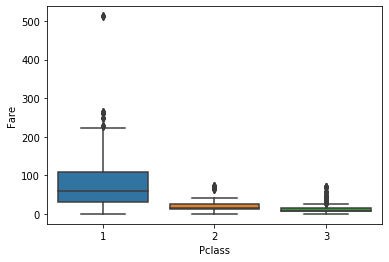

In [48]:
sns.boxplot(data=td,x='Pclass',y='Fare')

In [49]:
td['Fare_Category'] = pd.cut(td['Fare'], bins=[0,7.90,14.45,31.28,120], labels=['Low','Mid','High_Mid','High'])

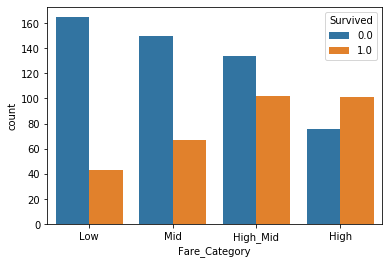

In [50]:
sns.countplot(td['Fare_Category'],hue=td['Survived'])

In [52]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3,Family,Fare_Category
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1,1,Low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,1,High
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1,0,Mid
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,1,High
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,1,0,Mid


In [54]:
td.Embarked.mode()[0]

'S'

In [55]:
td.Embarked.fillna(td.Embarked.mode()[0], inplace = True)

In [57]:
td.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            0
male                0
Q                   0
S                   0
2                   0
3                   0
Family              0
Fare_Category      85
dtype: int64

In [59]:
td.Cabin = td.Cabin.fillna('NA')
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3,Family,Fare_Category
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,1,0,1,0,1,1,Low
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,1,High
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,0,1,0,1,0,Mid
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,1,High
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,1,0,1,0,1,0,Mid


In [60]:
td.drop(['Pclass','Cabin', 'Fare_Category','Name', 'Ticket','Embarked','Sex'], axis=1, inplace=True)


In [83]:
td.head(5)
td["Fare"] = td["Fare"].fillna(td["Fare"].median())

In [158]:
td.head(2)

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Family
0,1,0.0,22.0,1,0,7.2500,1,0,1,0,1,1
1,2,1.0,38.0,1,0,71.2833,0,0,0,0,0,1


In [159]:
td_numerical_features = list(td.select_dtypes(include=['int64','float64','int32']).columns)
td_numerical_features

['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Family']

In [160]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [161]:
td_ss_scaler = StandardScaler()

In [162]:
td_ss = pd.DataFrame(data = td)

In [164]:
td_ss[td_numerical_features] = td_ss_scaler.fit_transform(td_ss[td_numerical_features])

In [165]:
td_ss.shape

(1309, 12)

In [166]:
td.shape

(1309, 12)

In [167]:
X_to_predict_ss = td_ss[td_ss['Survived'].isnull()]

In [170]:
X_to_predict_ss.head(2)
X_to_predict_ss = X_to_predict_ss.drop(['Survived'],axis=1)


KeyError: "['Survived'] not found in axis"

In [172]:
train_data_ss = td_ss.dropna()
train_data_ss.head(3)

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Family
0,-1.730728,-0.789272,-0.544508,0.481288,-0.445,-0.503291,1,0,1,0,1,0.073352
1,-1.728082,1.266990,0.674320,0.481288,-0.445,0.734744,0,0,0,0,0,0.073352
2,-1.725435,1.266990,-0.239801,-0.479087,-0.445,-0.490240,0,0,1,0,1,-0.558346


In [173]:
feature_train_ss = train_data_ss['Survived']
label_train_ss = train_data_ss.drop(['Survived'],axis = 1)

In [84]:
X_to_predict = td[td['Survived'].isnull()]

In [85]:
X_to_predict.head(3)
X_to_predict = X_to_predict.drop(['Survived'],axis=1)
#X_to_be_predicted = X_to_be_predicted.drop(['Survived'], axis = 1)

In [86]:
X_to_predict.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
2              0
3              0
Family         0
dtype: int64

In [87]:
td.isnull().sum()

PassengerId      0
Survived       418
Age              0
SibSp            0
Parch            0
Fare             0
male             0
Q                0
S                0
2                0
3                0
Family           0
dtype: int64

In [88]:
train_data = td.dropna()

In [89]:
train_data.head(4)

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Family
0,1,0.0,22.0,1,0,7.2500,1,0,1,0,1,1
1,2,1.0,38.0,1,0,71.2833,0,0,0,0,0,1
2,3,1.0,26.0,0,0,7.9250,0,0,1,0,1,0
3,4,1.0,35.0,1,0,53.1000,0,0,1,0,0,1


In [90]:
train_data.shape

(891, 12)

In [91]:
train.shape

(891, 12)

In [92]:

feature_train = train_data['Survived']
label_train = train_data.drop(['Survived'],axis = 1)

In [93]:
feature_train.head(5)

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(label_train, feature_train, test_size=0.2)

In [174]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss = train_test_split(label_train_ss, feature_train_ss, test_size=0.2)

In [178]:
rfc = RandomForestClassifier(n_estimators=700)

In [181]:
#rfc.fit(X_train_ss,y_train_ss)
y_train_ss.head(2)

748   -0.789272
195    1.266990
Name: Survived, dtype: float64

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

In [120]:
y_pred = rfc.predict(X_test)

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       109
         1.0       0.79      0.74      0.76        70

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [123]:
print(confusion_matrix(y_test,y_pred))

[[95 14]
 [18 52]]


In [124]:
X_to_predict.head()

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3,Family
891,892,34.5,0,0,7.8292,1,1,0,0,1,0
892,893,47.0,1,0,7.0000,0,0,1,0,1,1
893,894,62.0,0,0,9.6875,1,1,0,1,0,0
894,895,27.0,0,0,8.6625,1,0,1,0,1,0
895,896,22.0,1,1,12.2875,0,0,1,0,1,2


In [125]:
result = rfc.predict(X_to_predict)

In [126]:
result

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [127]:
my_result = pd.DataFrame({'PassengerId':X_to_predict['PassengerId'],'Survived':result})


In [128]:
my_result.head()

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,0.0


In [129]:
my_result['Survived'] = my_result['Survived'].astype(int)

In [139]:
my_result.head(2)

,PassengerId,Survived
891,892,0
892,893,0


In [131]:
my_result.to_csv('titanic_rf.csv',index=False)

In [132]:
from sklearn.svm import SVC

In [134]:
svc=SVC()

In [136]:
svc.fit(X_train,y_train)

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [137]:
result_svc = svc.predict(X_to_predict)

In [138]:
my_result_svc = pd.DataFrame({'PassengerId':X_to_predict['PassengerId'],'Survived':result_svc})

In [140]:
my_result_svc['Survived'] = my_result_svc['Survived'].astype(int)

In [141]:
my_result_svc.to_csv('titanic_svc.csv',index=False)

In [145]:
result_svc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [182]:
from sklearn.linear_model import LogisticRegression

In [183]:
logreg = LogisticRegression()

In [185]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
X_tr_encoded = lab_enc.fit_transform(X_train_ss)

ValueError: bad input shape (712, 11)

In [184]:
logreg.fit(X_train_ss,y_train_ss)

C:\Users\aksha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [149]:
log_predict=logreg.predict(X_to_predict)

In [150]:
log_predict

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [151]:
my_result_log = pd.DataFrame({'PassengerId':X_to_predict['PassengerId'],'Survived':log_predict})

In [152]:
my_result_log['Survived'] = my_result_log['Survived'].astype(int)

In [153]:
my_result_log.head(2)

,PassengerId,Survived
891,892,0
892,893,0


In [154]:
my_result_log.to_csv('titanic_log.csv',index=False)

In [155]:
X_to_predict.head(2)

,PassengerId,Age,SibSp,Parch,Fare,male,Q,S,2,3,Family
891,892,34.5,0,0,7.8292,1,1,0,0,1,0
892,893,47.0,1,0,7.0000,0,0,1,0,1,1
